In [1]:
!pip install pot
!pip install torch
!pip install geomloss
!pip install wget
!pip install mdatagen
!pip install pot
!pip install torch
!pip install geomloss
!pip install wget
!pip install numpy scipy sklearn
!pip install jax
!pip install chex
!pip install attr
!pip install optax



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import sys
sys.path.append(r"C:\Users\zhossai3\Desktop\Fair_Imputation") 


import Utils
import CMI
import Inject_Missing_Values
import RR_imputer
import Sinkhorn_CMI
import SinkhornImputation
import SoftImpute



c:\Users\zhossai3\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\__init__.py:1144: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\tensor\python_tensor.cpp:434.)
  _C._set_default_tensor_type(t)


In [2]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd

from geomloss import SamplesLoss

from sklearn.preprocessing import scale
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

from Utils import *
from SoftImpute import softimpute, cv_softimpute
from SinkhornImputation import SinkhornImputation
from Sinkhorn_CMI import *
from RR_imputer import RRimputer
import matplotlib.pyplot as plt
from CMI import *

from Inject_Missing_Values import *

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.debug("test")
import pandas as pd

torch.set_default_tensor_type('torch.DoubleTensor')

**Load Data**

In [4]:
import pandas as pd

# Read CSV file into a Pandas DataFrame
groundTruth = pd.read_csv(r'C:\Users\zhossai3\Desktop\Fair_Imputation\Data\German Credit\German_Credit_Ground_Truth.csv', delimiter=',', header=0)

# Store feature columns in a DataFrame


X= groundTruth.iloc[:, :-1]  # Selects all rows and all columns except the last one
Y = groundTruth.iloc[:, -1]  # Selects all rows and only the last column


In [5]:
groundTruth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   checking-account                       1000 non-null   int64
 1   duration                               1000 non-null   int64
 2   credit-history                         1000 non-null   int64
 3   purpose                                1000 non-null   int64
 4   credit-amount                          1000 non-null   int64
 5   savings-account                        1000 non-null   int64
 6   employment-since                       1000 non-null   int64
 7   installment-rate                       1000 non-null   int64
 8   other-debtors                          1000 non-null   int64
 9   residence-since                        1000 non-null   int64
 10  property                               1000 non-null   int64
 11  age                            

In [6]:
groundTruth.nunique()

checking-account                           4
duration                                  33
credit-history                             5
purpose                                   10
credit-amount                            921
savings-account                            5
employment-since                           5
installment-rate                           4
other-debtors                              3
residence-since                            4
property                                   4
age                                       53
other-installment                          3
housing                                    3
existing-credits                           4
job                                        4
number-people-provide-maintenance-for      2
telephone                                  2
foreign-worker                             2
sex                                        2
marital-status                             2
class-label                                2
dtype: int

In [8]:
groundTruth_tensor = torch.tensor(scale(groundTruth)) #converting groundTruth to Tensor, z-score scaling

In [9]:
print(groundTruth_tensor.min())
print(groundTruth_tensor.max())
print(groundTruth_tensor.mean())
print(groundTruth_tensor.median())

tensor(-5.1017)
tensor(5.3708)
tensor(1.2919e-18)
tensor(-0.0222)


In [10]:
bucket_specs = {
     
    11: 4,   # Column 11 → age (4 bins)
    19: 2,  # Column 19 → sex (2 bins)
    21: 2,  # Column 21 → label  (2 bins)
    5: 5,   # Column 5 → savings-account (5 bins)
    15: 4,   # Column 15 → jobs (4 bins)
    #0: 4, #column 0 -> checking-account (4 bins)
    3: 10, #column 3 -> purpose (10 bins)
    #1: 5,  #column 1 -> duration (5 bins)
    2: 5, #column 2 -> credit history (5 bins)
    6: 5, #employment-since
    
}

# Define multiple attributes for X, Y, Z
X_cols = [11,19]  # Bucketized sensitive attributes (e.g., sex, race, age)
Y_cols = [21]     # Bucketized outcome-related attributes
Z_cols = [2,3,5,6,15]  
#Z_cols = [2, 5, 6, 10, 13, 14]

**CMI for GroundTruth**

In [11]:
cmi_groundTruth = CMI.conditional_mutual_information(groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
print(cmi_groundTruth)

0.2044231140171539


Generating MCAR 30%, added the target coloumn

In [12]:
generator = Inject_Missing_Values()
miss_mcar30,index_mcar30 = generator.MCAR(X,missing_rate=30)
type(miss_mcar30)
total_missing_percentage_mar30= miss_mcar30.isnull().sum().sum() / miss_mcar30.size * 100
print(f"Total Missing Percentage MAR30: {total_missing_percentage_mar30:.2f}%")

missing_percentage = (miss_mcar30.isnull().sum() / len(miss_mcar30)) * 100
print(missing_percentage)

miss_mcar30 = pd.concat([miss_mcar30, Y], axis=1) #adding the target coloumn

Total Missing Percentage MAR30: 30.00%
checking-account                         28.2
duration                                 28.3
credit-history                           29.8
purpose                                  31.1
credit-amount                            30.2
savings-account                          29.1
employment-since                         33.7
installment-rate                         29.0
other-debtors                            30.8
residence-since                          30.9
property                                 28.2
age                                      27.5
other-installment                        29.6
housing                                  33.3
existing-credits                         29.2
job                                      28.4
number-people-provide-maintenance-for    30.8
telephone                                33.4
foreign-worker                           28.7
sex                                      29.4
marital-status                           

In [14]:
miss_mcar30_numpy = scale(miss_mcar30) #z-score scaling
miss_mcar30_tensor = torch.tensor(miss_mcar30_numpy) #converting to tensor

Applying Sinkhorn algorithm to MCAR 30% data

In [15]:
#only Sinkhorn
n_mcar30, d_mcar30 = miss_mcar30_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar30 = pick_epsilon(miss_mcar30_tensor)
print(epsilon_mcar30)
mask_mcar30= torch.isnan(miss_mcar30_tensor).double()


on_sk_imputer_mcar30 = SinkhornImputation(eps=epsilon_mcar30, batchsize=batchsize, lr=lr, niter=2000)
on_sk_imp_mcar30, on_sk_maes30mcar, on_sk_rmses30mcar = on_sk_imputer_mcar30.fit_transform(miss_mcar30_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mcar30_numpy = on_sk_imp_mcar30.detach().cpu().numpy()
on_sk_mae_mcar30 = MAE(on_sk_imp_mcar30,groundTruth_tensor , mask_mcar30)
on_sk_rmse_mcar30 = RMSE(on_sk_imp_mcar30, groundTruth_tensor, mask_mcar30)
print(on_sk_mae_mcar30,on_sk_rmse_mcar30)

0.7276261487926826


INFO:root:batchsize = 128, epsilon = 0.7276
INFO:root:Iteration 0:	 Loss: 5.2889	 Validation MAE: 0.7800	RMSE: 1.0077
c:\Users\zhossai3\AppData\Local\Programs\Python\Python312\Lib\site-packages\geomloss\samples_loss.py:47: SyntaxWarning: invalid escape sequence '\i'
  """Creates a criterion that computes distances between sampled measures on a vector space.


KeyboardInterrupt: 

Calculating CMI after applying the Sinkhorn Imputation (only Sinkhorn algorithm)

In [95]:
#only CMI
on_cmi_missmcar30 = CMI.conditional_mutual_information(on_sk_imp_mcar30, X_cols, Y_cols, Z_cols, bucket_specs)
print(on_cmi_missmcar30)
print(on_sk_mae_mcar30,on_sk_rmse_mcar30)

0.17646723991764332
tensor(0.6958, grad_fn=<DivBackward0>) tensor(1.0031, grad_fn=<SqrtBackward0>)


Applying Sinkhorn-CMI algorithm to MCAR 30%

In [96]:
#sinkhorn_CMI
n_mcar30, d_mcar30 = miss_mcar30_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mcar30 = pick_epsilon(miss_mcar30_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mcar30)
mask_mcar30= torch.isnan(miss_mcar30_tensor).double()


sk_imputer_mcar30 = SinkhornImputation_CMI(eps=epsilon_mcar30, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mcar30, sk_maes30mcar, sk_rmses30mcar,cmi_loss,sinkhorn_loss_mcar30 = sk_imputer_mcar30.fit_transform(miss_mcar30_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mcar30_numpy = sk_imp_mcar30.detach().cpu().numpy()

sk_mae_mcar30 = MAE(sk_imp_mcar30,groundTruth_tensor , mask_mcar30)
sk_rmse_mcar30 = RMSE(sk_imp_mcar30, groundTruth_tensor, mask_mcar30)
print(sk_mae_mcar30,sk_rmse_mcar30)





0.7275712338940321


INFO:root:Iteration 0:	 Loss: 5.4902	 Validation MAE: 0.7925	RMSE: 1.0238
INFO:root:Iteration 50:	 Loss: 5.7534	 Validation MAE: 0.7260	RMSE: 1.0126
INFO:root:Iteration 100:	 Loss: 5.3294	 Validation MAE: 0.7135	RMSE: 1.0079
INFO:root:Iteration 150:	 Loss: 5.2703	 Validation MAE: 0.7060	RMSE: 1.0030
INFO:root:Iteration 200:	 Loss: 5.1571	 Validation MAE: 0.7011	RMSE: 1.0001
INFO:root:Iteration 250:	 Loss: 4.9644	 Validation MAE: 0.6980	RMSE: 0.9987
INFO:root:Iteration 300:	 Loss: 5.3436	 Validation MAE: 0.6962	RMSE: 0.9979
INFO:root:Iteration 350:	 Loss: 5.4236	 Validation MAE: 0.6967	RMSE: 0.9982
INFO:root:Iteration 400:	 Loss: 5.5924	 Validation MAE: 0.6962	RMSE: 0.9986
INFO:root:Iteration 450:	 Loss: 5.9793	 Validation MAE: 0.6974	RMSE: 1.0007
INFO:root:Iteration 500:	 Loss: 5.1805	 Validation MAE: 0.6957	RMSE: 0.9998
INFO:root:Iteration 550:	 Loss: 5.2224	 Validation MAE: 0.6950	RMSE: 1.0003
c:\Users\zhossai3\AppData\Local\Programs\Python\Python312\Lib\site-packages\geomloss\sample

KeyboardInterrupt: 

CMI for Sinkhorn_CMI Imputation

In [ ]:
#CMI
cmi_mcar30 = CMI.conditional_mutual_information(sk_imp_mcar30, X_cols, Y_cols, Z_cols, bucket_specs)
print(cmi_mcar30)
print(sk_mae_mcar30,sk_rmse_mcar30)

0.19272237285615323
tensor(0.6836, grad_fn=<DivBackward0>) tensor(0.9919, grad_fn=<SqrtBackward0>)


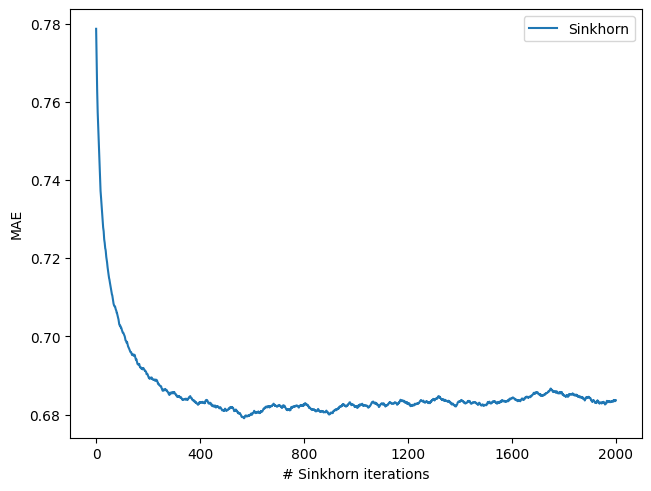

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(sk_maes30mcar)

ax.plot(np.linspace(0, 1, npoints) * npoints, sk_maes30mcar, label='Sinkhorn')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')
ax.set_ylabel('MAE')
plt.legend()
plt.show()

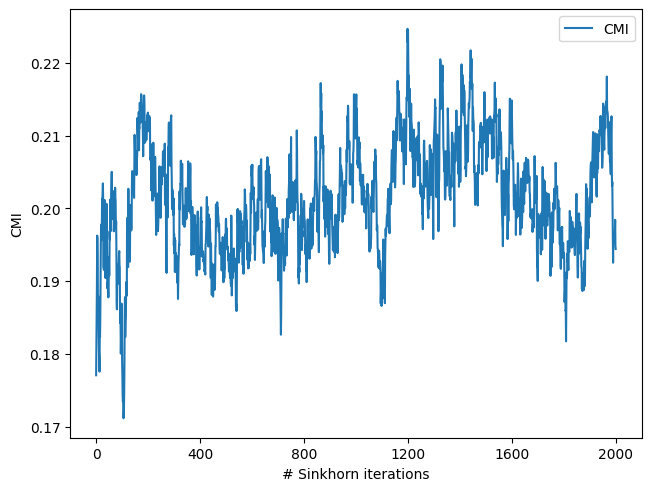

In [ ]:
fig, ax = plt.subplots(constrained_layout=True)
npoints = len(cmi_loss)

ax.plot(np.linspace(0, 1, npoints) * npoints, cmi_loss, label='CMI')
ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('CMI')
plt.legend()
plt.show()

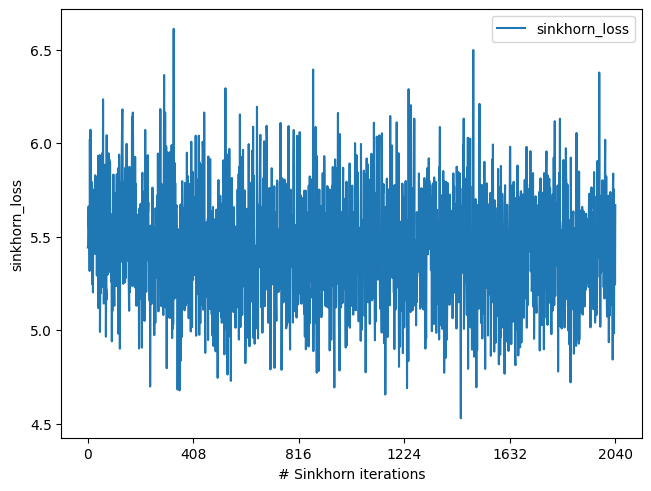

In [ ]:
sinkhorn_loss_mcar30 = torch.tensor(sinkhorn_loss_mcar30)
fig, ax = plt.subplots(constrained_layout=True)

npoints = len(sinkhorn_loss_mcar30)

ax.plot(np.linspace(0, 1, npoints) * npoints, sinkhorn_loss_mcar30.detach().numpy(), label='sinkhorn_loss')

ax.set_xticks(np.linspace(0, npoints, 6))
ax.set_xlabel('# Sinkhorn iterations')

ax.set_ylabel('sinkhorn_loss')
plt.legend()
plt.show()

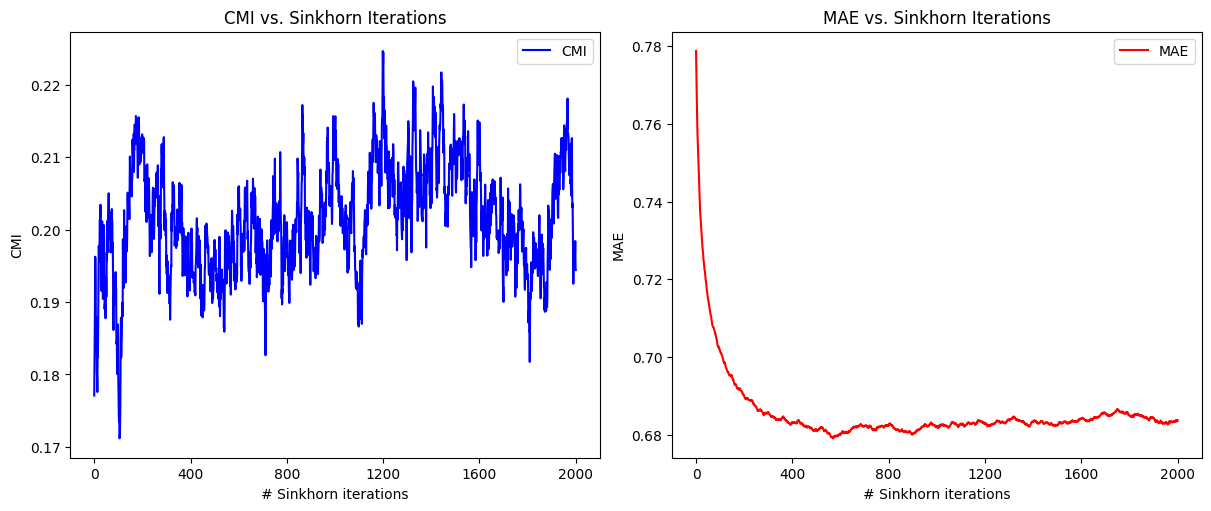

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (Replace with actual values)
npoints_cmi = len(cmi_loss)  # Length of CMI data
npoints_mae = len(sk_maes30mcar)  # Length of MAE data

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# First graph (CMI)
axes[0].plot(np.linspace(0, 1, npoints_cmi) * npoints_cmi, cmi_loss, label='CMI', color='b')
axes[0].set_xticks(np.linspace(0, npoints_cmi, 6))
axes[0].set_xlabel('# Sinkhorn iterations')
axes[0].set_ylabel('CMI')
axes[0].legend()
axes[0].set_title('CMI vs. Sinkhorn Iterations')

# Second graph (MAE)
axes[1].plot(np.linspace(0, 1, npoints_mae) * npoints_mae, sk_maes30mcar, label='MAE', color='r')
axes[1].set_xticks(np.linspace(0, npoints_mae, 6))
axes[1].set_xlabel('# Sinkhorn iterations')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].set_title('MAE vs. Sinkhorn Iterations')

# Show the combined plot
plt.show()


In [20]:
# Find the best trade-off index using the heuristic
best_tradeoff_idx = np.argmin(sk_maes30mcar + cmi_loss)

# Get the corresponding values
best_cmi = cmi_loss[best_tradeoff_idx]
best_mae = sk_maes30mcar[best_tradeoff_idx]

# Display the best trade-off values
best_tradeoff_idx, best_cmi, best_mae


(np.int64(711), 0.18265153978163282, np.float64(0.6821907880732259))

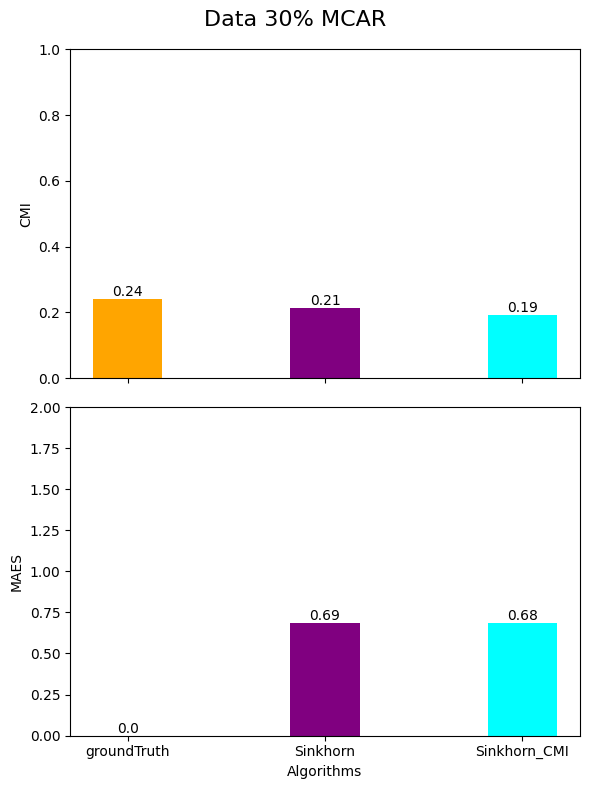

In [ ]:

# Define values and categories
values_cmi_mcar30 = [cmi_groundTruth,on_cmi_missmcar30,cmi_mcar30]
values_maes_mcar30 = [0.0,on_sk_mae_mcar30.detach(),sk_mae_mcar30.detach()]
categories = ["groundTruth","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange', 'purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 30% MCAR', fontsize=16)

# Plot Mean MAE bars and add values on top
bars1 = ax1.bar(index, values_cmi_mcar30, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot Mean RMSE bars and add values on top
bars2 = ax2.bar(index, values_maes_mcar30, color=colors, width=bar_width)
ax2.set_ylabel("MAES")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show()


**30% MAR**

In [21]:
dependencies_mar30 = {"savings-account": {
        "influencers": ["age"],
        "condition": lambda row:  True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["age"]<=25 else 0.2 
    },
    "checking-account": {
        "influencers": ["age"],
        "condition": lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["age"]<=25 else 0.2 
    },
    "credit-amount": {
        "influencers": ["age"],
        "condition":  lambda row: True ,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["age"]<=25 else 0.2 
    },
    "employment-since": {
        "influencers": ["sex"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["sex"]==1 else 0.1
    },
    "duration": {
        "influencers": ["sex"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["sex"]==1 else 0.2 
    },
    
    "job": {
        "influencers": ["employment-since"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["employment-since"]<2 else 0.2 
    },

    "purpose": {
        "influencers": ["age"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["age"]<=25 else 0.2 
    },

    "other-installment": {
        "influencers": ["credit-history"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["credit-history"]<2 else 0.2 
    },

     "housing": {
        "influencers": ["residence-since"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["residence-since"]<3 else 0.2 
    },
     "other-debtors": {
        "influencers": ["property"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["property"]<2 else 0.2 
    },

     "foreign-worker": {
        "influencers": ["telephone"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["telephone"]==1 else 0.2 
    },
     "number-people-provide-maintenance-for": {
        "influencers": ["marital-status"],
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["marital-status"]==1 else 0.2 
    }



}

In [22]:
generator_mar30 = Inject_Missing_Values()
miss_mar30,index_mar30 = generator_mar30.MAR(X,dependencies_mar30,missing_rate=30)
miss_mar30 = pd.concat([miss_mar30, Y], axis=1) #adding the target coloumn

total_missing_percentage_mar30= miss_mar30.isnull().sum().sum() / miss_mar30.size * 100
print(f"Total Missing Percentage MAR30: {total_missing_percentage_mar30:.2f}%")

Total Missing Percentage MAR30: 28.64%


In [23]:
missing_percentage = (miss_mar30.isnull().sum() / len(miss_mar30)) * 100
print(missing_percentage)

checking-account                         48.0
duration                                 61.1
credit-history                            0.0
purpose                                  46.4
credit-amount                            46.8
savings-account                          46.2
employment-since                         56.4
installment-rate                          0.0
other-debtors                            54.6
residence-since                           0.0
property                                  0.0
age                                       0.0
other-installment                        66.1
housing                                  52.3
existing-credits                          0.0
job                                      56.9
number-people-provide-maintenance-for    44.2
telephone                                 0.0
foreign-worker                           51.0
sex                                       0.0
marital-status                            0.0
class-label                       

In [116]:
miss_mar30_numpy = scale(miss_mar30) #z-score scaling
miss_mar30_tensor = torch.tensor(miss_mar30_numpy) #converting to tensor

In [117]:
print(miss_mar30)

     checking-account  duration  credit-history  purpose  credit-amount  \
0                 NaN       NaN               0      7.0            NaN   
1                 NaN       NaN               1      NaN            NaN   
2                 NaN       NaN               0      NaN            NaN   
3                 NaN       NaN               1      NaN            NaN   
4                 NaN       NaN               2      NaN            NaN   
..                ...       ...             ...      ...            ...   
995               NaN       NaN               1      NaN            NaN   
996               NaN       NaN               1      NaN            NaN   
997               NaN       NaN               1      NaN          804.0   
998               NaN       NaN               1      7.0            NaN   
999               NaN       NaN               0      2.0            NaN   

     savings-account  employment-since  installment-rate  other-debtors  \
0                NaN    

In [27]:
#only Sinkhorn
n_mar30, d_mar30 = miss_mar30_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mar30 = pick_epsilon(miss_mar30_tensor)
print(epsilon_mar30)
mask_mar30= torch.isnan(miss_mar30_tensor).double()


on_sk_imputer_mar30 = SinkhornImputation(eps=epsilon_mar30, batchsize=batchsize, lr=lr, niter=2000)
on_sk_imp_mar30, on_sk_maes30mar, on_sk_rmses30mar = on_sk_imputer_mar30.fit_transform(miss_mar30_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mar30_numpy = on_sk_imp_mar30.detach().cpu().numpy()
on_sk_mae_mar30 = MAE(on_sk_imp_mar30,groundTruth_tensor , mask_mar30)
on_sk_rmse_mar30 = RMSE(on_sk_imp_mar30, groundTruth_tensor, mask_mar30)
print(on_sk_mae_mar30,on_sk_rmse_mar30)

INFO:root:batchsize = 128, epsilon = 0.8326
INFO:root:Iteration 0:	 Loss: 5.3448	 Validation MAE: 0.8103	RMSE: 1.0047


0.8325931227772367


INFO:root:Iteration 50:	 Loss: 5.3978	 Validation MAE: 0.7933	RMSE: 0.9909
INFO:root:Iteration 100:	 Loss: 4.9951	 Validation MAE: 0.7885	RMSE: 0.9873
INFO:root:Iteration 150:	 Loss: 5.0433	 Validation MAE: 0.7844	RMSE: 0.9840
INFO:root:Iteration 200:	 Loss: 5.5753	 Validation MAE: 0.7835	RMSE: 0.9833
INFO:root:Iteration 250:	 Loss: 5.1917	 Validation MAE: 0.7820	RMSE: 0.9822
INFO:root:Iteration 300:	 Loss: 6.0485	 Validation MAE: 0.7802	RMSE: 0.9805
INFO:root:Iteration 350:	 Loss: 4.6303	 Validation MAE: 0.7797	RMSE: 0.9808
INFO:root:Iteration 400:	 Loss: 5.5079	 Validation MAE: 0.7778	RMSE: 0.9799
INFO:root:Iteration 450:	 Loss: 5.1810	 Validation MAE: 0.7774	RMSE: 0.9798
INFO:root:Iteration 500:	 Loss: 4.9518	 Validation MAE: 0.7769	RMSE: 0.9799
INFO:root:Iteration 550:	 Loss: 5.3571	 Validation MAE: 0.7774	RMSE: 0.9802
INFO:root:Iteration 600:	 Loss: 5.1010	 Validation MAE: 0.7779	RMSE: 0.9810
INFO:root:Iteration 650:	 Loss: 5.2853	 Validation MAE: 0.7764	RMSE: 0.9803
INFO:root:Ite

tensor(0.7778, grad_fn=<DivBackward0>) tensor(0.9798, grad_fn=<SqrtBackward0>)


In [28]:
#only CMI
on_cmi_missmar30 = CMI.conditional_mutual_information(on_sk_imp_mar30, X_cols, Y_cols, Z_cols, bucket_specs)
print(on_cmi_missmar30)
print(on_sk_mae_mar30,on_sk_rmse_mar30)

0.17368959543749843
tensor(0.7778, grad_fn=<DivBackward0>) tensor(0.9798, grad_fn=<SqrtBackward0>)


In [29]:
#sinkhorn_CMI
n_mar30, d_mar30 = miss_mar30_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mar30 = pick_epsilon(miss_mar30_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mar30)
mask_mar30= torch.isnan(miss_mar30_tensor).double()


sk_imputer_mar30 = SinkhornImputation_CMI(eps=epsilon_mar30, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mar30, sk_maes30mar, sk_rmses30mar,cmi_loss_mar30,sinkhorn_loss_mar30 = sk_imputer_mar30.fit_transform(miss_mar30_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mar30_numpy = sk_imp_mar30.detach().cpu().numpy()

sk_mae_mar30 = MAE(sk_imp_mar30,groundTruth_tensor , mask_mar30)
sk_rmse_mar30 = RMSE(sk_imp_mar30, groundTruth_tensor, mask_mar30)
print(sk_mae_mar30,sk_rmse_mar30)


0.8325931227772367


INFO:root:Iteration 0:	 Loss: 5.0108	 Validation MAE: 0.8135	RMSE: 1.0085
INFO:root:Iteration 50:	 Loss: 5.7007	 Validation MAE: 0.7930	RMSE: 0.9926
INFO:root:Iteration 100:	 Loss: 5.6714	 Validation MAE: 0.7854	RMSE: 0.9859
INFO:root:Iteration 150:	 Loss: 5.4909	 Validation MAE: 0.7839	RMSE: 0.9846
INFO:root:Iteration 200:	 Loss: 5.5179	 Validation MAE: 0.7832	RMSE: 0.9834
INFO:root:Iteration 250:	 Loss: 5.1704	 Validation MAE: 0.7817	RMSE: 0.9826
INFO:root:Iteration 300:	 Loss: 5.3659	 Validation MAE: 0.7795	RMSE: 0.9805
INFO:root:Iteration 350:	 Loss: 5.4117	 Validation MAE: 0.7793	RMSE: 0.9805
INFO:root:Iteration 400:	 Loss: 5.9264	 Validation MAE: 0.7777	RMSE: 0.9799
INFO:root:Iteration 450:	 Loss: 6.1101	 Validation MAE: 0.7773	RMSE: 0.9795
INFO:root:Iteration 500:	 Loss: 5.5139	 Validation MAE: 0.7770	RMSE: 0.9800
INFO:root:Iteration 550:	 Loss: 5.2540	 Validation MAE: 0.7772	RMSE: 0.9801
INFO:root:Iteration 600:	 Loss: 5.4828	 Validation MAE: 0.7773	RMSE: 0.9808
INFO:root:Itera

tensor(0.7775, grad_fn=<DivBackward0>) tensor(0.9792, grad_fn=<SqrtBackward0>)


In [30]:
#CMI
cmi_mar30 = CMI.conditional_mutual_information(sk_imp_mar30, X_cols, Y_cols, Z_cols, bucket_specs)
print(cmi_mar30)
print(sk_mae_mar30,sk_rmse_mar30)

0.17256875023547724
tensor(0.7775, grad_fn=<DivBackward0>) tensor(0.9792, grad_fn=<SqrtBackward0>)


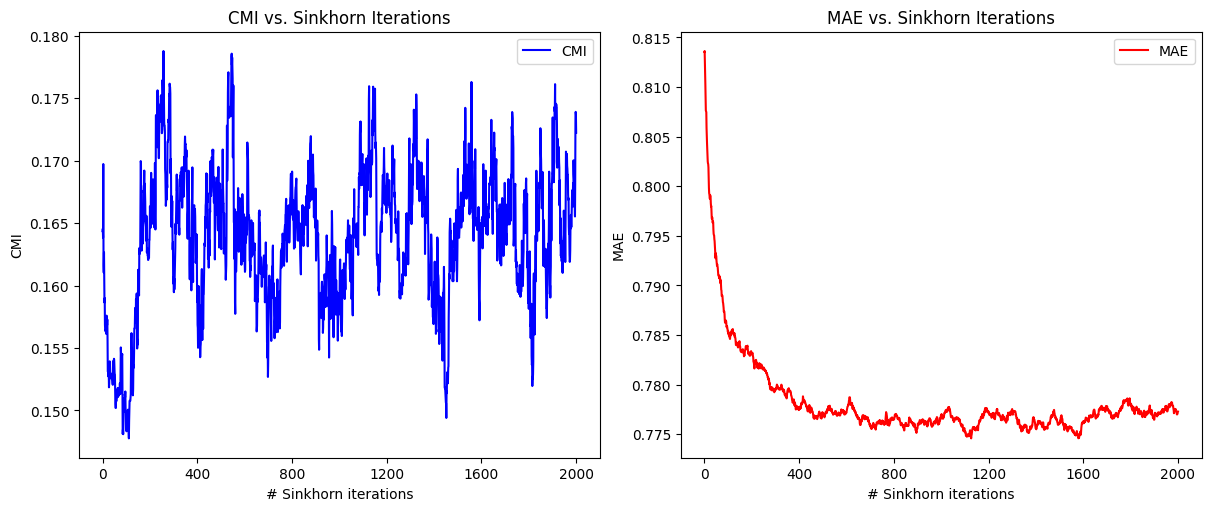

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (Replace with actual values)
npoints_cmi = len(cmi_loss_mar30)  # Length of CMI data
npoints_mae = len(sk_maes30mar)  # Length of MAE data

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# First graph (CMI)
axes[0].plot(np.linspace(0, 1, npoints_cmi) * npoints_cmi, cmi_loss_mar30, label='CMI', color='b')
axes[0].set_xticks(np.linspace(0, npoints_cmi, 6))
axes[0].set_xlabel('# Sinkhorn iterations')
axes[0].set_ylabel('CMI')
axes[0].legend()
axes[0].set_title('CMI vs. Sinkhorn Iterations')

# Second graph (MAE)
axes[1].plot(np.linspace(0, 1, npoints_mae) * npoints_mae, sk_maes30mar, label='MAE', color='r')
axes[1].set_xticks(np.linspace(0, npoints_mae, 6))
axes[1].set_xlabel('# Sinkhorn iterations')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].set_title('MAE vs. Sinkhorn Iterations')

# Show the combined plot
plt.show()


In [ ]:

# Define values and categories
values_cmi_mar30 = [cmi_groundTruth,on_cmi_missmar30,cmi_mar30]
values_maes_mar30 = [0.0,on_sk_mae_mar30.detach(),sk_mae_mar30.detach()]
categories = ["groundTruth","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange', 'purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 30% MCAR', fontsize=16)

# Plot Mean MAE bars and add values on top
bars1 = ax1.bar(index, values_cmi_mar30, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot Mean RMSE bars and add values on top
bars2 = ax2.bar(index, values_maes_mar30, color=colors, width=bar_width)
ax2.set_ylabel("MAES")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show()


**30% MNAR**

In [ ]:
dependencies_mnar30 = {
    "checking-account": {
        
        "condition": lambda row: True,
        "probability": lambda row: 0.5 if row["checking-account"] < 2 else 0.05
    },
    "duration": {
        
        "condition": lambda row: True,
        "probability": lambda row: 0.5 if row["duration"] <= 20 else 0.05
    },
    "savings-account": {
        
        "condition": lambda row: True,
        "probability": lambda row: 0.2 if row["savings-account"] != 0 else 0.1
    },
    "employment-since": {
        
         "condition": lambda row: True,
        "probability": lambda row: 0.2 if row["employment-since"] in [1,2] else 0.1
    },
    "credit-amount": {
        
         "condition": lambda row: True,
        "probability": lambda row: 0.25 if row["credit-amount"] > 5000 else 0.05
    },
    "job": {
        
         "condition": lambda row: True,
        "probability": lambda row: 0.25 if row["job"] < 2 else 0.05
    },

    "other-installment": {
       
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["other-installment"]==0 else 0.2 
    },

    "housing": {
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["housing"]==2 else 0.2 
    },

    "other-debtors": {
       
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["other-debtors"]==0 else 0.2 
    },

     "foreign-worker": {
        
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["foreign-worker"]==1 else 0.2 
    },
     "number-people-provide-maintenance-for": {
       
        "condition": lambda row: True,  # Just a boolean condition
        "probability" : lambda row: 0.5 if row["number-people-provide-maintenance-for"]==1 else 0.2 
    }



}


In [111]:
generator_mnar30 = Inject_Missing_Values()
miss_mnar30,index_mnar30 = generator_mnar30.MNAR(X,dependencies_mnar30,missing_rate=30)

miss_mnar30 = pd.concat([miss_mnar30, Y], axis=1) #adding the target coloumn

total_missing_percentage_mnar30= miss_mnar30.isnull().sum().sum() / miss_mnar30.size * 100
print(f"Total Missing Percentage MNAR30: {total_missing_percentage_mnar30:.2f}%")

6300


KeyError: 'jobs'

In [34]:
miss_mnar30_numpy = scale(miss_mnar30) #z-score scaling
miss_mnar30_tensor = torch.tensor(miss_mnar30_numpy) #converting to tensor

c:\Users\zhossai3\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_data.py:246: RuntimeWarning: Mean of empty slice
  mean_ = np.nanmean(X, axis)
c:\Users\zhossai3\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\zhossai3\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_data.py:254: RuntimeWarning: Mean of empty slice
  mean_1 = np.nanmean(Xr, axis=0)
c:\Users\zhossai3\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_data.py:261: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
c:\Users\zhossai3\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_data.py:273

In [35]:
#only Sinkhorn
n_mnar30, d_mnar30 = miss_mnar30_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mnar30 = pick_epsilon(miss_mnar30_tensor)
print(epsilon_mnar30)
mask_mnar30= torch.isnan(miss_mnar30_tensor).double()


on_sk_imputer_mnar30 = SinkhornImputation(eps=epsilon_mnar30, batchsize=batchsize, lr=lr, niter=2000)
on_sk_imp_mnar30, on_sk_maes30mnar, on_sk_rmses30mnar = on_sk_imputer_mnar30.fit_transform(miss_mnar30_tensor, verbose=True, report_interval=50, X_true=groundTruth_tensor)

#using numpy version of data
on_sk_imp_mnar30_numpy = on_sk_imp_mnar30.detach().cpu().numpy()
on_sk_mae_mnar30 = MAE(on_sk_imp_mnar30,groundTruth_tensor , mask_mnar30)
on_sk_rmse_mnar30 = RMSE(on_sk_imp_mnar30, groundTruth_tensor, mask_mnar30)
print(on_sk_mae_mnar30,on_sk_rmse_mnar30)

IndexError: kthvalue(): Expected reduction dim 0 to have non-zero size.

In [ ]:
#only CMI
on_cmi_missmnar30 = CMI.conditional_mutual_information(on_sk_imp_mnar30, X_cols, Y_cols, Z_cols, bucket_specs)
print(on_cmi_missmnar30)
print(on_sk_mae_mnar30,on_sk_rmse_mnar30)

In [ ]:
#sinkhorn_CMI
n_mnar30, d_mnar30 = miss_mnar30_tensor.shape
batchsize = 128 # If the batch size is larger than half the dataset's size,
                # it will be redefined in the imputation methods.
lr = 1e-2
epsilon_mnar30 = pick_epsilon(miss_mnar30_tensor)
#epsilon_mcar30 = 0.3
print(epsilon_mnar30)
mask_mnar30= torch.isnan(miss_mnar30_tensor).double()


sk_imputer_mnar30 = SinkhornImputation_CMI(eps=epsilon_mnar30, batchsize=batchsize, lr=lr, niter=2000)
sk_imp_mnar30, sk_maes30mnar, sk_rmses30mnar,cmi_loss_mnar30, sinkhorn_loss_mnar30= sk_imputer_mnar30.fit_transform(miss_mnar30_tensor, True, 50, groundTruth_tensor, X_cols, Y_cols, Z_cols, bucket_specs)
#using numpy version of data
sk_imp_mnar30_numpy = sk_imp_mnar30.detach().cpu().numpy()

sk_mae_mnar30 = MAE(sk_imp_mnar30,groundTruth_tensor , mask_mnar30)
sk_rmse_mnar30 = RMSE(sk_imp_mnar30, groundTruth_tensor, mask_mnar30)
print(sk_mae_mnar30,sk_rmse_mnar30)





In [ ]:
#CMI
cmi_mnar30 = CMI.conditional_mutual_information(sk_imp_mnar30, X_cols, Y_cols, Z_cols, bucket_specs)
print(cmi_mnar30)
print(sk_mae_mnar30,sk_rmse_mnar30)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (Replace with actual values)
npoints_cmi = len(cmi_loss_mnar30)  # Length of CMI data
npoints_mae = len(sk_maes30mnar)  # Length of MAE data

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# First graph (CMI)
axes[0].plot(np.linspace(0, 1, npoints_cmi) * npoints_cmi, cmi_loss_mnar30, label='CMI', color='b')
axes[0].set_xticks(np.linspace(0, npoints_cmi, 6))
axes[0].set_xlabel('# Sinkhorn iterations')
axes[0].set_ylabel('CMI')
axes[0].legend()
axes[0].set_title('CMI vs. Sinkhorn Iterations')

# Second graph (MAE)
axes[1].plot(np.linspace(0, 1, npoints_mae) * npoints_mae, sk_maes30mnar, label='MAE', color='r')
axes[1].set_xticks(np.linspace(0, npoints_mae, 6))
axes[1].set_xlabel('# Sinkhorn iterations')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].set_title('MAE vs. Sinkhorn Iterations')

# Show the combined plot
plt.show()


In [ ]:
# Convert the list of losses to a NumPy array

iterations = np.linspace(0, 2000, 50).astype(int)



loss_values = loss_vision_mcar30


# Assuming cmi_penalty_history is also a list, convert it to a NumPy array
#cmi_penalty_history_numpy = np.array(cmi_penalty_history)

# Total loss calculation
#total_loss = sk_loss_mcar30_numpy + cmi_penalty_history_numpy
if len(loss_values) > len(iterations):
    loss_values = loss_values[:len(iterations)]
elif len(loss_values) < len(iterations):
    iterations = iterations[:len(loss_values)]



# Plotting
plt.figure(figsize=(8, 5))
plt.plot(iterations, loss_values, color='b', linestyle='-', marker='o', label="Loss Value")
plt.xlabel("Iterations")
plt.ylabel("Loss Value")
plt.title("Loss Curve")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



In [ ]:

# Define values and categories
values_cmi_mcar30 = [cmi_groundTruth,on_cmi_missmcar30,cmi_mcar30]
values_maes_mcar30 = [0.0,on_sk_mae_mcar30.detach(),sk_mae_mcar30.detach()]
categories = ["groundTruth","Sinkhorn","Sinkhorn_CMI"]
colors = ['orange', 'purple', 'cyan']

# Bar chart parameters
bar_width = 0.35 # Width of each bar
index = np.arange(len(categories))  

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
fig.suptitle('Data 30% MCAR', fontsize=16)

# Plot Mean MAE bars and add values on top
bars1 = ax1.bar(index, values_cmi_mcar30, color=colors, width=bar_width)
ax1.set_ylabel("CMI")
ax1.set_ylim(0, 1) 
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Plot Mean RMSE bars and add values on top
bars2 = ax2.bar(index, values_maes_mcar30, color=colors, width=bar_width)
ax2.set_ylabel("MAES")
ax2.set_ylim(0, 2) 
for bar in bars2:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')


ax2.set_xticks(index)
ax2.set_xticklabels(categories)

# Show the plot
plt.xlabel('Algorithms')
plt.tight_layout()
plt.show()
